In [68]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Wall time: 0 ns


## Problem statement : To train a classification model or survival of travelers on Titanic`

### Data Gathering

In [22]:
df= pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.392817,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.504490,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,4.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.PassengerId.nunique()

891

In [7]:
df.Survived.unique()

array([0, 1, 2, 4], dtype=int64)

In [10]:
df.loc[(df['Survived']==2) | (df['Survived']==4)]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,2,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
26,27,4,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

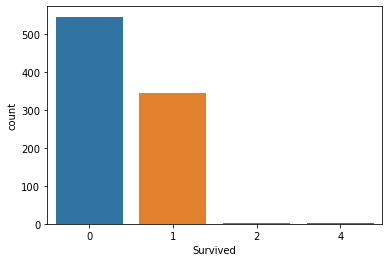

In [11]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

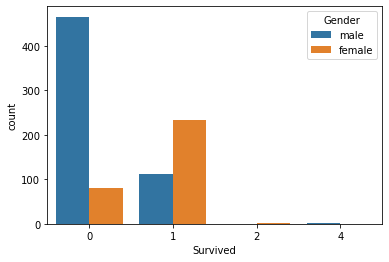

In [12]:
sns.countplot(x='Survived', hue='Gender',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

<AxesSubplot:xlabel='Gender', ylabel='count'>

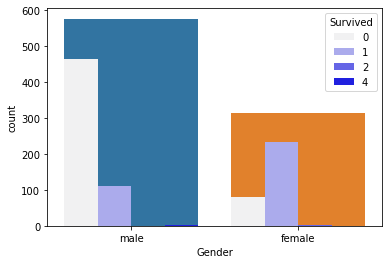

In [17]:
display(sns.countplot(x='Gender',data=df))
display(sns.countplot(x='Gender', hue='Survived',data=df,color="Blue"))

In [23]:
df['Survived']=df['Survived'].replace(2,1).replace(4,0)

In [24]:
df['Survived'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

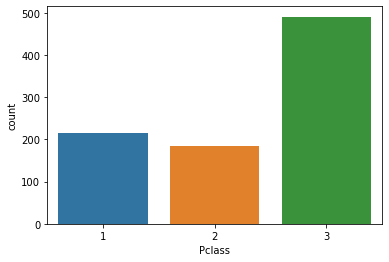

In [25]:
sns.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

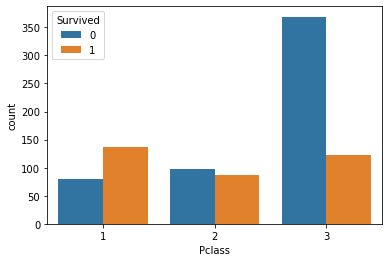

In [26]:
sns.countplot(x='Pclass',hue= 'Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

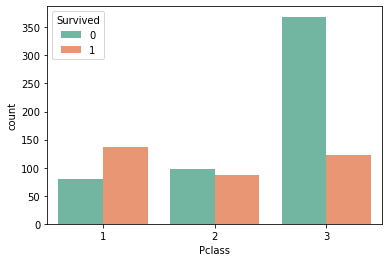

In [38]:
display(sns.countplot(x='Pclass',hue='Survived',data=df,palette="Set2"))
# display(sns.countplot(x='Survived',data=df))

<AxesSubplot:xlabel='SibSp'>

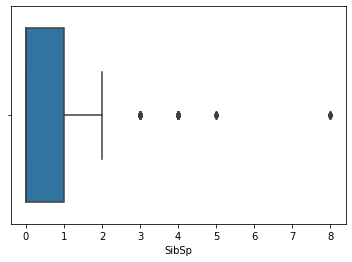

In [39]:
sns.boxplot(x='SibSp',data=df)

In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Fare'>

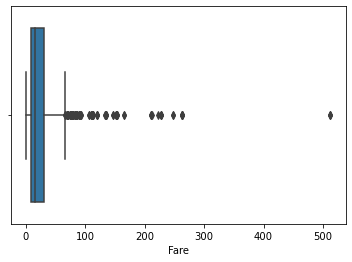

In [41]:
sns.boxplot(x='Fare',data=df)

In [43]:
sorted(df['SibSp'].unique())

[0, 1, 2, 3, 4, 5, 8]

In [45]:
df[df['SibSp']>2].shape

(46, 12)

In [48]:
df[df['Fare']>200].shape

(20, 12)

In [52]:
df=df.drop(np.where(df['Fare']>200)[0])

In [54]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [55]:
df.Embarked.value_counts()

S    636
C    156
Q     77
Name: Embarked, dtype: int64

In [56]:
df['Embarked']=df['Embarked'].fillna('S')

In [58]:
df['Gender']=df['Gender'].replace('male',0).replace('female',1)

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
df=df.drop(['Name','Cabin','Ticket'],axis=1)

In [62]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [63]:
df = pd.get_dummies(df, prefix=['Embarked'],drop_first=True )
df

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,1,0,7.2500,0,1
1,2,1,1,1,38.000000,1,0,71.2833,0,0
2,3,1,3,1,26.000000,0,0,7.9250,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,1
4,5,0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,1
887,888,1,1,1,19.000000,0,0,30.0000,0,1
888,889,0,3,1,29.661164,1,2,23.4500,0,1
889,890,1,1,0,26.000000,0,0,30.0000,0,0


In [66]:
df.corr()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.026027,-0.032224,-0.048585,0.031673,-0.049230,0.006580,-0.003510,-0.033150,0.026654
Survived,-0.026027,1.000000,-0.322983,0.532938,-0.082279,-0.028772,0.082957,0.296419,0.014483,-0.141358
Pclass,-0.032224,-0.322983,1.000000,-0.118369,-0.340795,0.094324,0.051138,-0.653248,0.216358,0.050278
Gender,-0.048585,0.532938,-0.118369,1.000000,-0.084441,0.110942,0.251004,0.232512,0.079045,-0.115601
Age,0.031673,-0.082279,-0.340795,-0.084441,1.000000,-0.229770,-0.192121,0.127849,-0.013675,-0.017580
SibSp,-0.049230,-0.028772,0.094324,0.110942,-0.229770,1.000000,0.409380,0.246085,-0.025241,0.065138
Parch,0.006580,0.082957,0.051138,0.251004,-0.192121,0.409380,1.000000,0.230427,-0.077635,0.066605
Fare,-0.003510,0.296419,-0.653248,0.232512,0.127849,0.246085,0.230427,1.000000,-0.140705,-0.109163
Embarked_Q,-0.033150,0.014483,0.216358,0.079045,-0.013675,-0.025241,-0.077635,-0.140705,1.000000,-0.515309
Embarked_S,0.026654,-0.141358,0.050278,-0.115601,-0.017580,0.065138,0.066605,-0.109163,-0.515309,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  871 non-null    int64  
 1   Survived     871 non-null    int64  
 2   Pclass       871 non-null    int64  
 3   Gender       871 non-null    int64  
 4   Age          871 non-null    float64
 5   SibSp        871 non-null    int64  
 6   Parch        871 non-null    int64  
 7   Fare         871 non-null    float64
 8   Embarked_Q   871 non-null    uint8  
 9   Embarked_S   871 non-null    uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 95.2 KB


## Building Model

#### splitting the data

In [67]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=True)

#### Creating instance of the model & fitting the data

In [71]:
Log_Reg=LogisticRegression()
Log_Reg

LogisticRegression()

In [72]:
Log_Reg.fit(x_train,y_train)

LogisticRegression()

In [73]:
y_pred = Log_Reg.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [74]:
y_test

295    0
554    1
183    1
188    0
444    1
      ..
492    0
565    0
599    1
862    1
705    0
Name: Survived, Length: 175, dtype: int64

#### Evaluation of model

In [76]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[95, 12],
       [22, 46]], dtype=int64)

In [ ]:
     Predicted
     0      1
    
    TN      FP   0      Actual
    
    FN      TP   1
    
    
    
    

In [84]:
46/(46+12)   #>> Precision

0.7931034482758621

In [85]:
46/(46+22)   #>> Recall

0.6764705882352942

In [79]:
(95+46)/(95+46+22+12)   #>>Accuracy

0.8057142857142857

In [80]:
accuracy_score(y_test,y_pred)

0.8057142857142857

In [81]:
precision_score(y_test,y_pred)

0.7931034482758621

In [86]:
recall_score(y_test,y_pred)

0.6764705882352942

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       107
           1       0.79      0.68      0.73        68

    accuracy                           0.81       175
   macro avg       0.80      0.78      0.79       175
weighted avg       0.80      0.81      0.80       175



In [93]:
y_pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [95]:
y_pred_prob=Log_Reg.predict_proba(x_test)
y_pred_prob[:5]

array([[0.57407561, 0.42592439],
       [0.31655368, 0.68344632],
       [0.76379647, 0.23620353],
       [0.93529112, 0.06470888],
       [0.88145668, 0.11854332]])

In [96]:
roc_auc=roc_auc_score(y_test,y_pred)
roc_auc

0.7821605277625069

In [98]:
fpr,tpr,thres=roc_curve(y_test,y_pred)
print(fpr,tpr,thres,sep='\n')

[0.         0.11214953 1.        ]
[0.         0.67647059 1.        ]
[2 1 0]


### ROC Curve

Text(0, 0.5, 'True Positive Rate')

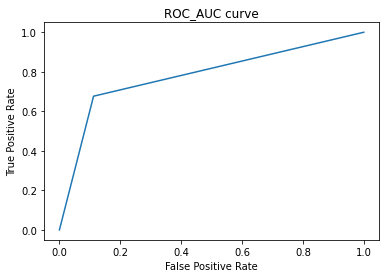

In [100]:
plt.title('ROC_AUC curve')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')